In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [107]:
df = pd.read_csv('new_data.csv')

In [108]:
df.head()

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LP,NGDP,...,NGDP_D,NGDP_FY,NGDP_RPCH,NID_NGDP,PCPI,PCPIPCH,PPPGDP,PPPPC,TM_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,32.941,1547.290,...,120.050,1547.290,-2.351,16.462,120.671,5.607,80.912,2456.29,-2.925,0.534
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,2.878,1644.080,...,203.320,1644.080,-3.482,22.790,108.613,1.621,40.658,14128.00,-19.535,-27.549
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,43.851,18383.800,...,256.869,18383.800,-5.100,41.852,211.180,2.415,497.030,11334.53,-18.943,-4.154
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.078,2.531,...,106.557,2.531,-11.184,0.000,102.298,0.257,4.092,52451.57,0.000,0.000
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,31.031,33611.360,...,2293.820,33611.360,-5.750,24.953,431.227,22.277,212.172,6837.35,-33.037,-7.342


##### Data Split 1: all of our final dataset, no scaling

In [109]:
# NGDPDPC - gdp_per_capita
y = df["NGDPDPC"]
X = df.drop(["NGDPDPC", "Country"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

##### Data Split 2: all of our final dataset, with scaling

In [110]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

In [111]:
y3 = y
X3 = df.drop(
    [
        "NGDPDPC",
        "BCA",
        "Country",
        "GGR_NGDP",
        "GGXCNL_NGDP",
        "GGXONLB_NGDP",
        "GGXWDG_NGDP",
        "GGX_NGDP",
        "LP",
        "NGDP",
        "NGDPD",
        "PPPPC",
    ],
    axis=1,
)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=101
)

##### Data Split 4: feature selected dataset, with scaling

In [112]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## SVM

##### Model Training


In [113]:
svm1 = SVR()
svm1.fit(X_train, y_train)

svm2 = SVR()
svm2.fit(X2_train, y2_train)

svm3 = SVR()
svm3.fit(X3_train, y3_train)

svm4 = SVR()
svm4.fit(X4_train, y4_train)

SVR()

In [114]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

In [115]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

SVM Performance:

all features, No scaling:
MAE: 9027.631205127636
RMSE: 14591.579766007391
R2_Score:  -0.1494926254036537

all features, with scaling:
MAE: 9021.403975003277
RMSE: 14584.102939005048
R2_Score:  -0.14831491117628826

selected features, No scaling:
MAE: 9027.631205127638
RMSE: 14591.579766007339
R2_Score:  -0.14949262540364527

selected features, with scaling:
MAE: 9021.759866454395
RMSE: 14583.542712108254
R2_Score:  -0.1482266912088508


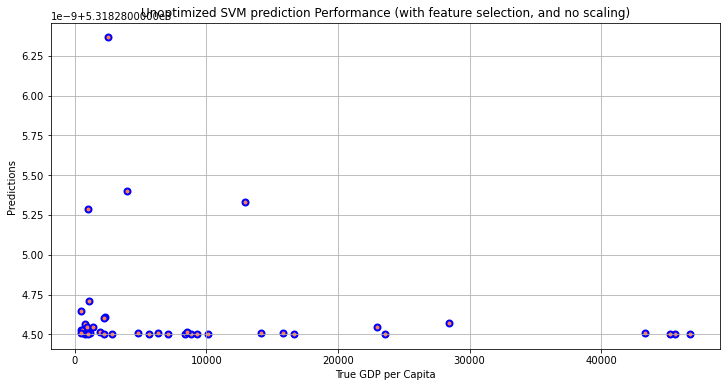

In [116]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and no scaling)') 
plt.grid()
plt.show()

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm. 

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

##### Optimizing SVM

In [117]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [118]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.254 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.331 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.263 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.254 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.331 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.263 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [119]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [120]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [121]:
grid_predictions = grid.predict(X4_test)

In [122]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

MAE: 8865.75986483415
RMSE: 14379.38958249612
R2_Score:  -0.1163039532353427


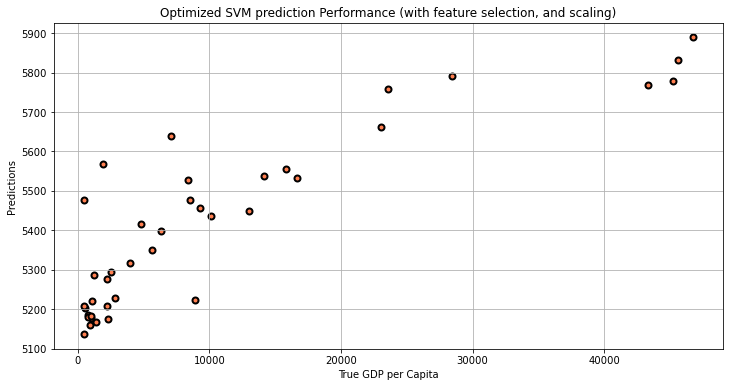

In [123]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()